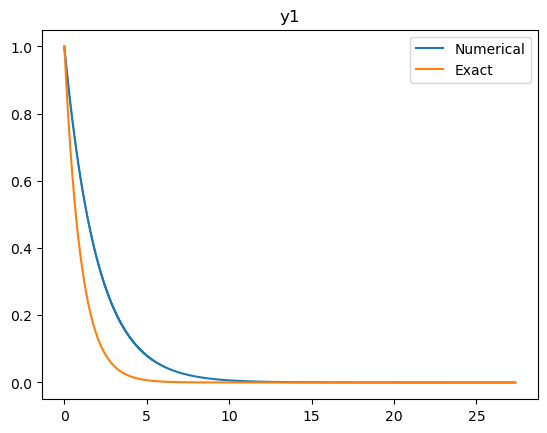

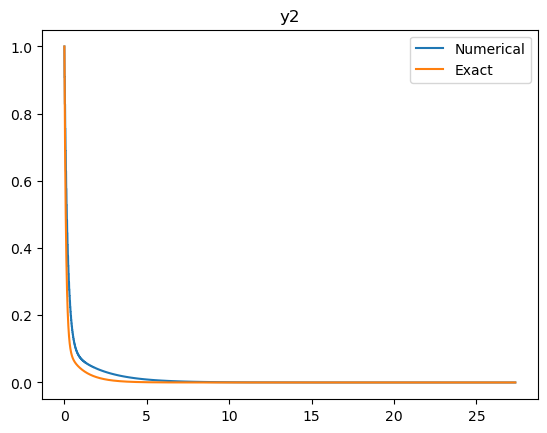

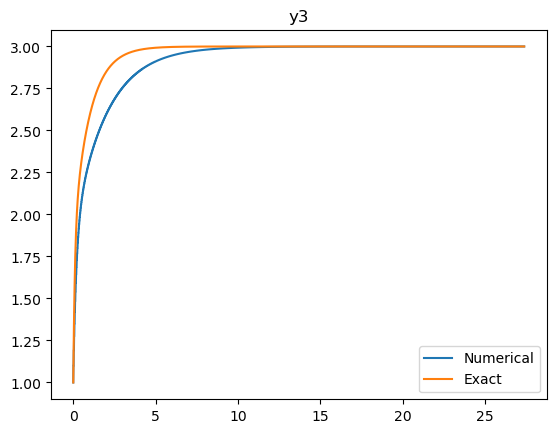

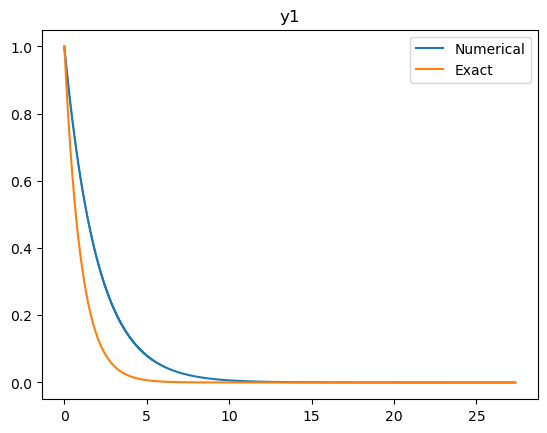

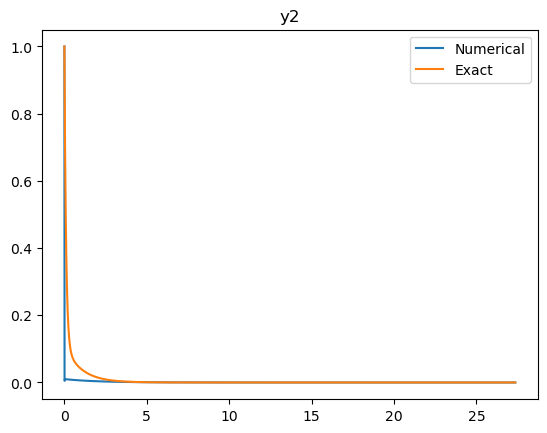

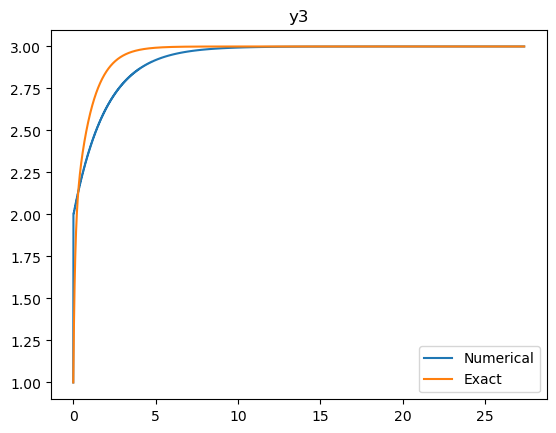

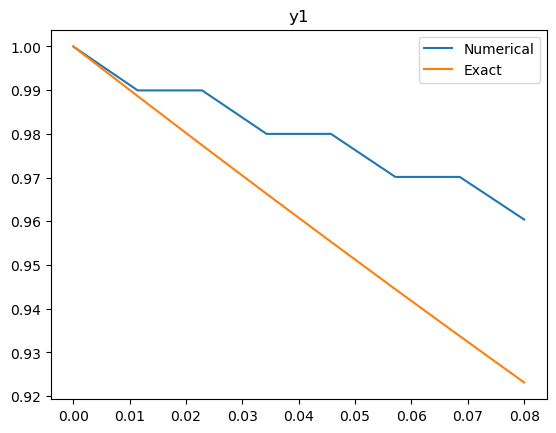

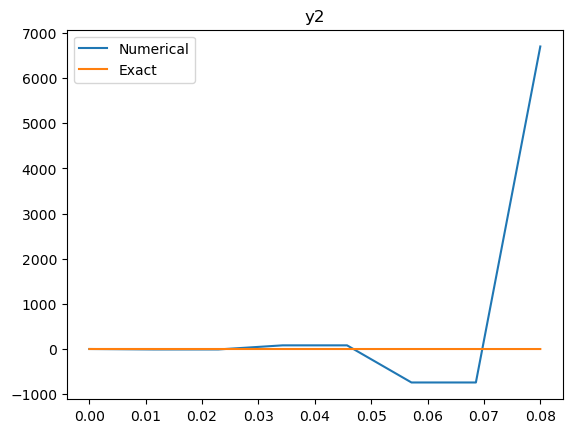

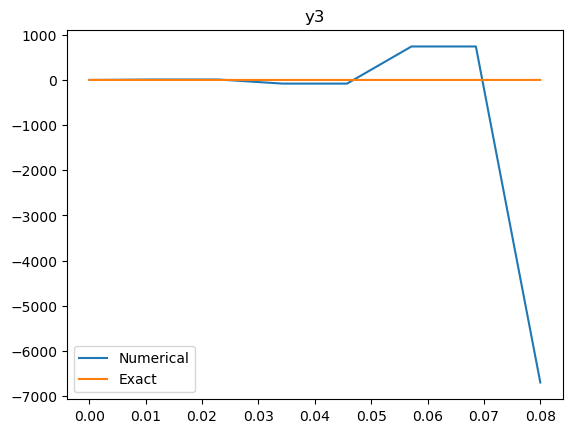

In [8]:
import numpy as np
import matplotlib.pyplot as plt
def f1(x):
    return np.exp(-x)
def f2(x):
    return np.exp(-x)/9+8*np.exp(-10*x)/9
def f3(x):
    return -10*np.exp(-x)/9-8*np.exp(-10*x)/9+3
def RK4(k2):
    h=0.01
    y1=[1]
    y2=[1]
    y3=[1]
    i=1
    K1=-y1[i-1]
    K2=-y1[i-1]+K1*0.5*h
    K3=-y1[i-1]+K2*0.5*h
    K4=-y1[i-1]+K3*h
    y1.append(y1[i-1]+h*(K1+2*K2+2*K3+K4)/6)
    K1=y1[i-1]-k2*y2[i-1]
    K2=y1[i-1]-k2*y2[i-1]+K1*0.5*h
    K3=y1[i-1]-k2*y2[i-1]+K2*0.5*h
    K4=y1[i-1]-k2*y2[i-1]+K3*h
    y2.append(y2[i-1]+h*(K1+2*K2+2*K3+K4)/6)
    K1=k2*y2[i-1]
    K2=k2*y2[i-1]+K1*0.5*h
    K3=k2*y2[i-1]+K2*0.5*h
    K4=k2*y2[i-1]+K3*h
    y3.append(y3[i-1]+h*(K1+2*K2+2*K3+K4)/6)
    tol=1e-6
    while y1[i]-f1(i*h)>tol or y2[i]-f2(i*h)>tol or y3[i]-f3(i*h)>tol:
        if (abs(y1[i]-y1[i-1])>1000) or abs(y2[i]-y2[i-1])>1000 or abs(y3[i]-y3[i-1])>1000:
            break
        K1=-y1[i-1]
        K2=-y1[i-1]+K1*0.5*h
        K3=-y1[i-1]+K2*0.5*h
        K4=-y1[i-1]+K3*h
        y1.append(y1[i-1]+h*(K1+2*K2+2*K3+K4)/6)
        K1=y1[i-1]-k2*y2[i-1]
        K2=y1[i-1]-k2*y2[i-1]+K1*0.5*h
        K3=y1[i-1]-k2*y2[i-1]+K2*0.5*h
        K4=y1[i-1]-k2*y2[i-1]+K3*h
        y2.append(y2[i-1]+h*(K1+2*K2+2*K3+K4)/6)
        K1=k2*y2[i-1]
        K2=k2*y2[i-1]+K1*0.5*h
        K3=k2*y2[i-1]+K2*0.5*h
        K4=k2*y2[i-1]+K3*h
        y3.append(y3[i-1]+h*(K1+2*K2+2*K3+K4)/6)
        i+=1
    return [y1,y2,y3]
res1 = RK4(10)
res2 = RK4(100)
res3 = RK4(1000)
def fig(res,i):
    x=np.linspace(0,0.01*len(res[0]),len(res[0]))
    plt.plot(x,res[0],label="Numerical")
    plt.plot(x,f1(x),label="Exact")
    plt.title("y1")
    plt.legend()
    plt.savefig("res"+str(i)+".jpg")
    plt.show()
    x=np.linspace(0,0.01*len(res[1]),len(res[1]))
    plt.plot(x,res[1],label="Numerical")
    plt.plot(x,f2(x),label="Exact")
    plt.title("y2")
    plt.legend()
    plt.savefig("res"+str(i+1)+".jpg")
    plt.show()
    x=np.linspace(0,0.01*len(res[2]),len(res[2]))
    plt.plot(x,res[2],label="Numerical")
    plt.plot(x,f3(x),label="Exact")
    plt.title("y3")
    plt.legend()
    plt.savefig("res"+str(i+2)+".jpg")
    plt.show()
    return
fig(res1,1)
fig(res2,4)
fig(res3,7)


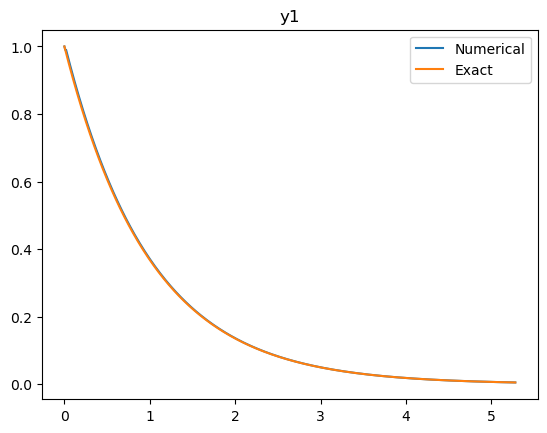

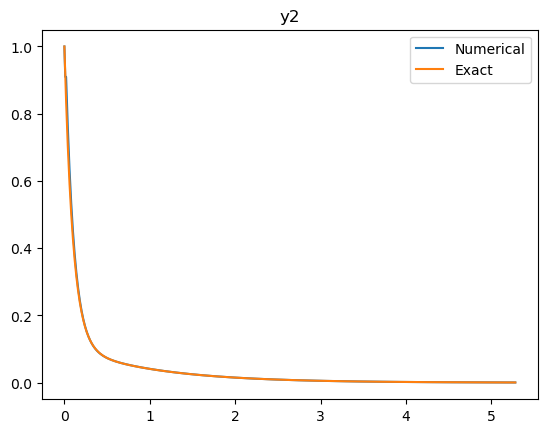

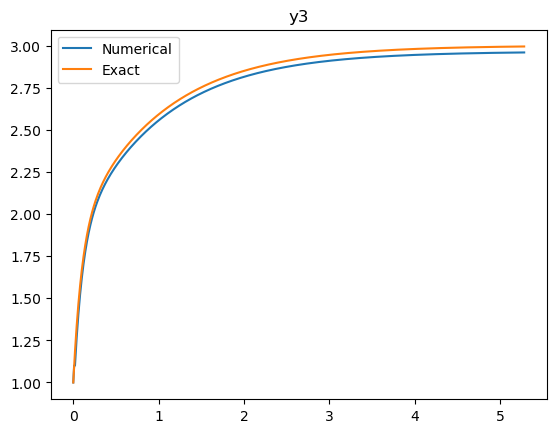

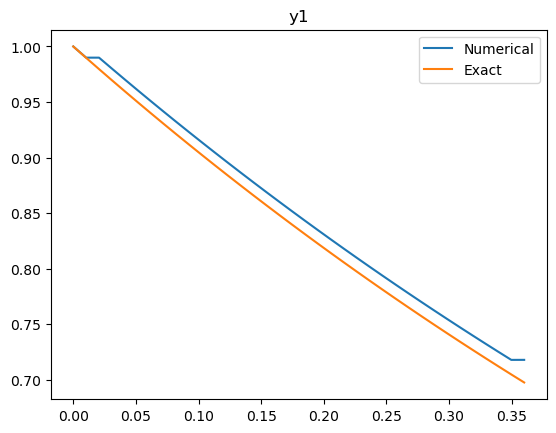

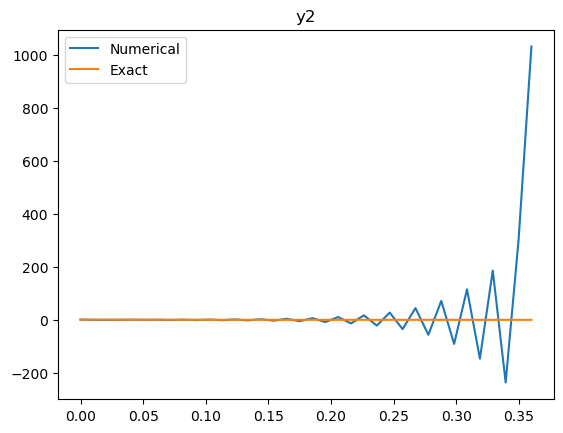

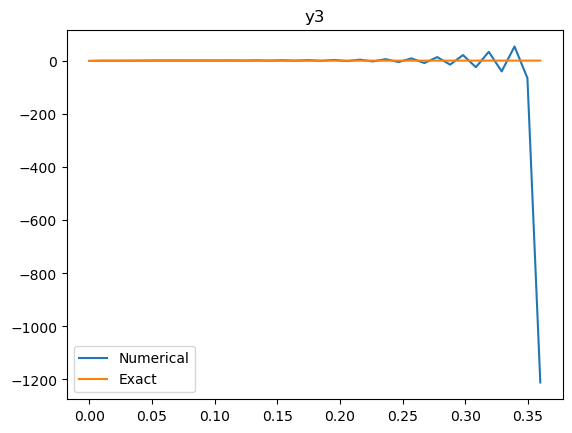

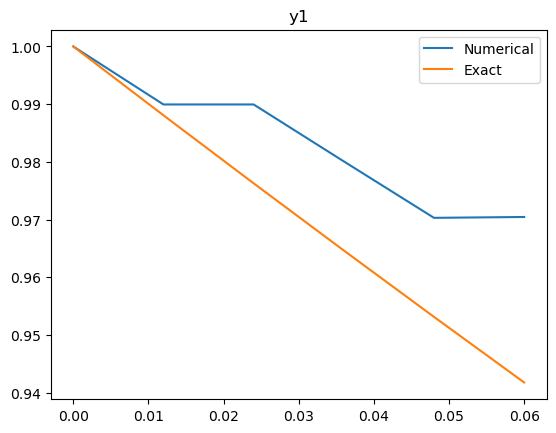

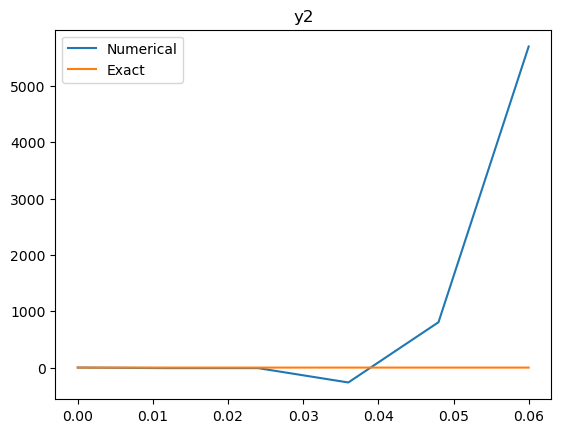

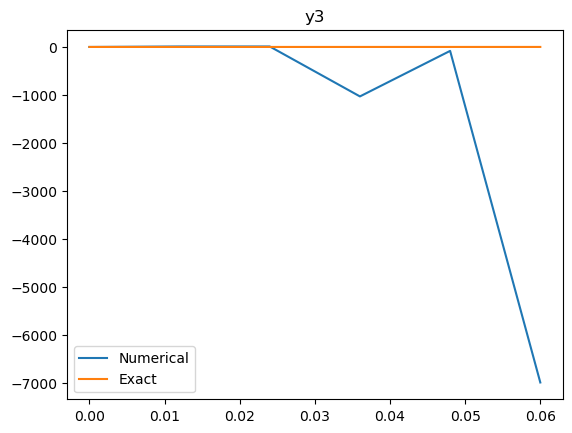

In [10]:
def AM(k2):
    h=0.01
    init=RK4(k2)
    y1=init[0][0:4]
    y2=init[1][0:4]
    y3=init[2][0:4]
    i=3
    tol=1e-6
    while y1[i]-f1(i*h)>tol or y2[i]-f2(i*h)>tol or y3[i]-f3(i*h)>tol:
        if (abs(y1[i]-y1[i-1])>1000) or abs(y2[i]-y2[i-1])>1000 or abs(y3[i]-y3[i-1])>1000:
            break
        y1.append(y1[i-1]-h*(55*y1[i-1]-59*y1[i-2]+37*y1[i-3]-9*y1[i-4])/24)
        y2.append(y2[i-1]+h*(55*y1[i-1]-59*y1[i-2]+37*y1[i-3]-9*y1[i-4])/24-k2*h*(55*y2[i-1]-59*y2[i-2]+37*y2[i-3]-9*y2[i-4])/24)
        y3.append(y3[i-1]+k2*h*(55*y2[i-1]-59*y2[i-2]+37*y2[i-3]-9*y2[i-4])/24)
        
        y1[i]=y1[i-1]-h*(9*y1[i]+19*y1[i-1]-5*y1[i-2]+y1[i-3])/24
        y2[i]=y2[i-1]+h*(9*y1[i]+19*y1[i-1]-5*y1[i-2]+y1[i-3])/24-k2*h*(9*y2[i]+19*y2[i-1]-5*y2[i-2]+y2[i-3])/24
        y3[i]=y3[i-1]+k2*h*(9*y2[i]+19*y2[i-1]-5*y2[i-2]+y2[i-3])/24
        i+=1
    return[y1,y2,y3]
res4 = AM(10)
res5 = AM(100)
res6 = AM(1000)
fig(res4,10)
fig(res5,13)
fig(res6,16)

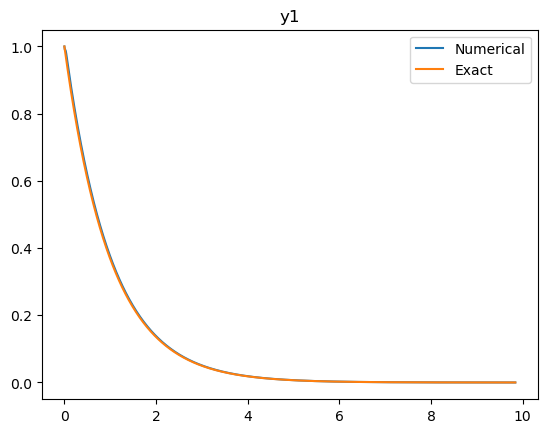

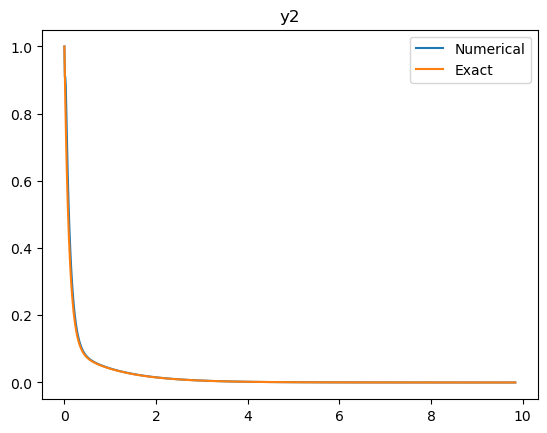

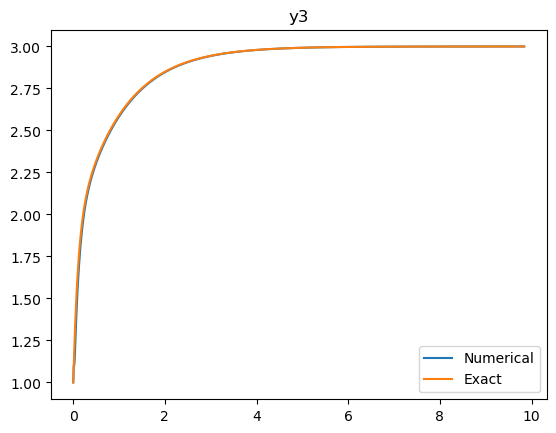

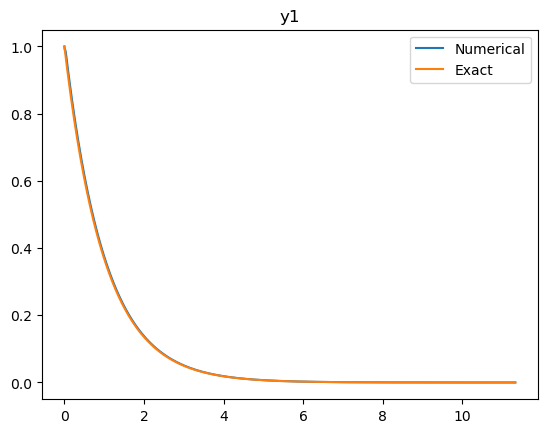

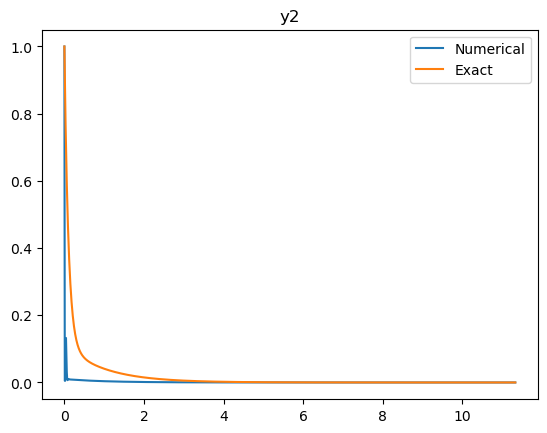

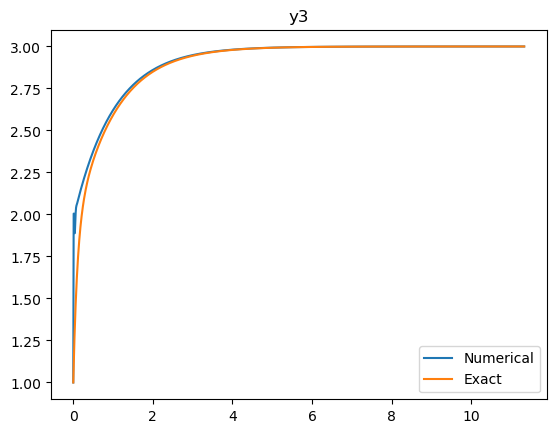

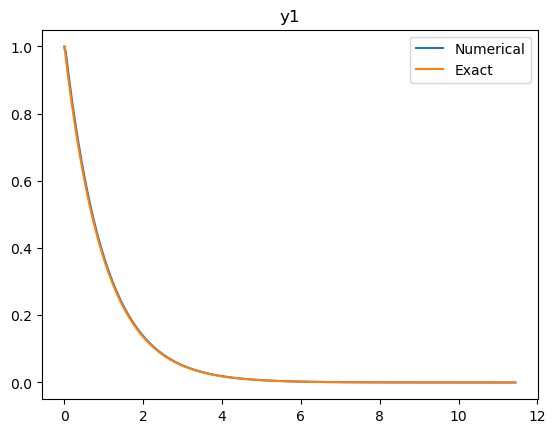

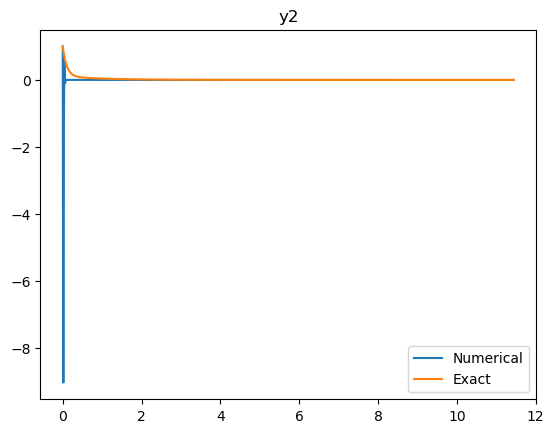

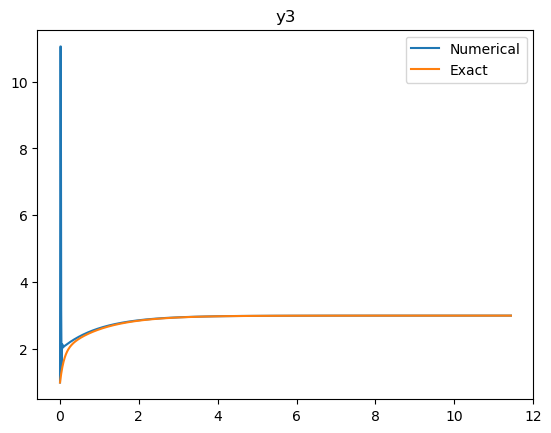

In [12]:
def BDF(k2):
    h=0.01
    init=RK4(k2)
    y1=init[0][0:3]
    y2=init[1][0:3]
    y3=init[2][0:3]
    rec1=11/(11+6*h)
    rec2=11/(11+6*h*k2)
    tol=1e-6
    i=2
    while y1[i]-f1(i*h)>tol or y2[i]-f2(i*h)>tol or y3[i]-f3(i*h)>tol:
        if (abs(y1[i]-y1[i-1])>1000) or abs(y2[i]-y2[i-1])>1000 or abs(y3[i]-y3[i-1])>1000:
            break
        y1.append(rec1*(18*y1[i]-9*y1[i-1]+2*y1[i-2])/11)
        y2.append(rec2*(18*y2[i]-9*y2[i-1]+2*y2[i-2]+6*h*y1[i+1])/11)
        y3.append((18*y3[i]-9*y3[i-1]+2*y3[i-2]+6*h*k2*y2[i+1])/11)
        i+=1
    return[y1,y2,y3]
res7 = BDF(10)
res8 = BDF(100)
res9 = BDF(1000)
fig(res7,19)
fig(res8,22)
fig(res9,25)